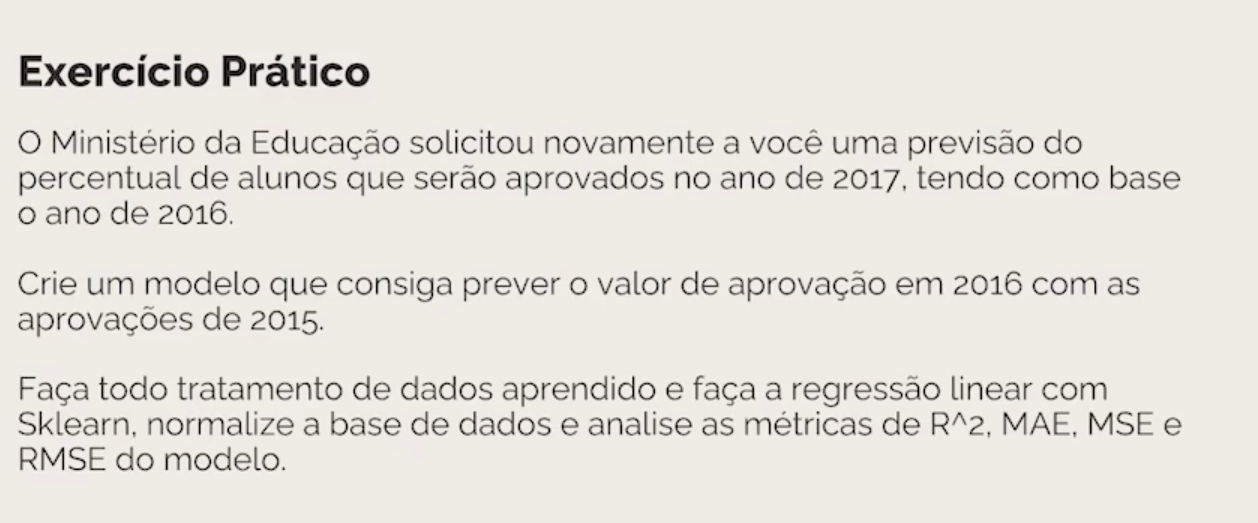

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler # Responsável pela normalização dos dados

import statsmodels.formula.api as smf

In [3]:
# Importando base
df = pd.read_excel('C+¦pia de aprovacao_alunos.xlsx')

# Análise exploratória

In [8]:
df.head(5)

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


Percebe-se a mediana muito distante da média, o que significa uma grande diferença na distribuição dos dados

In [6]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [7]:
# Não temos valores nulos
df.isna().sum()

,0
ano_2015,0
ano_2016,0


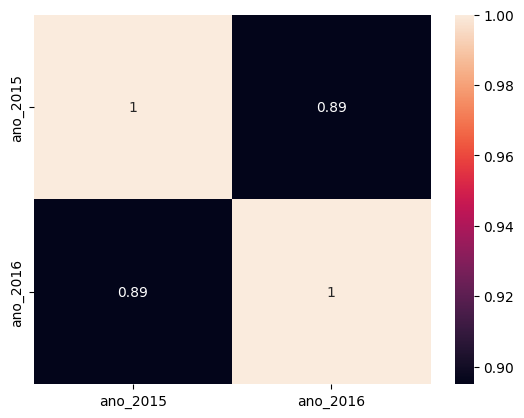

In [11]:
# Plotando gráfico para verificar correlação
sns.heatmap(df.corr(), annot=True);

Verificando distribuição dos dados

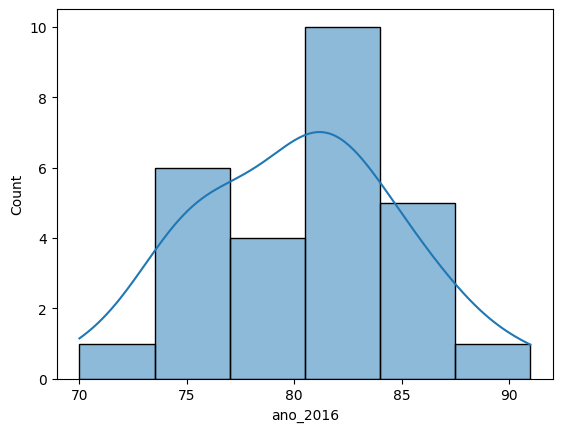

In [15]:
sns.histplot(df, x='ano_2016', kde=True);

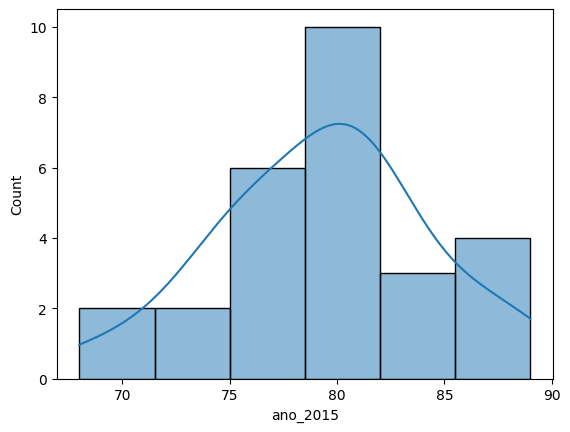

In [16]:
sns.histplot(df, x='ano_2015', kde=True);

Elevada correlação com uma tendência ascendente

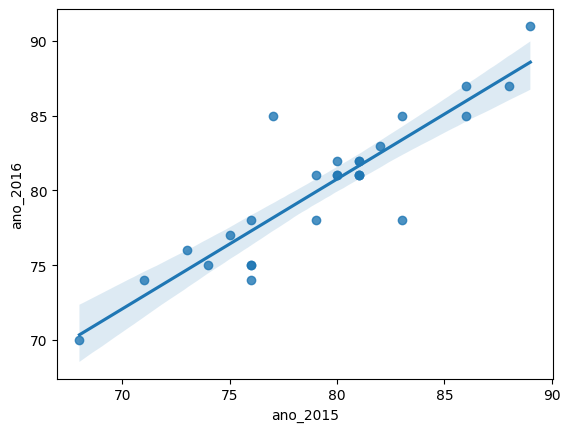

In [18]:
sns.regplot(df, x='ano_2015', y='ano_2016');

# Construindo o modelo

In [20]:
# Construindo o modelo
scala = MinMaxScaler() # Atribui o módulo a uma variável

df_norm = pd.DataFrame(scala.fit_transform(df), index=df.index, columns=df.columns)

In [21]:
df_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


In [22]:
# Construindo modelo com statsmodels
function = 'ano_2016~ano_2015'

model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           3.02e-10
Time:                        21:01:46   Log-Likelihood:                 23.726
No. Observations:                  27   AIC:                            -43.45
Df Residuals:                      25   BIC:                            -40.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.051      0.324      0.7

In [28]:
# Separando variáveis
x = df_norm[['ano_2015']]
y = df_norm[['ano_2016']] # Variável target

x_treino, x_test, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
# Criando o modelo de machine learning
lr = LinearRegression()
lr.fit(x_treino, y_treino)

LinearRegression()

In [30]:
# Plotando resultados
r_sq = lr.score(x_treino, y_treino)
print('R²:', r_sq)

R²: 0.8800910056640281


In [31]:
# Outros Resultados
y_pred_treino = lr.predict(x_treino)
print('MAE:', metrics.mean_absolute_error(y_treino, y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_treino, y_pred_treino))
print('RSAE:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.06313092719197842
MSE: 0.006947385853516443
RSAE: 0.08335097991935334


In [33]:
lr.fit(x_test, y_teste)

LinearRegression()

In [35]:
y_pred_teste = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred_teste))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred_teste))
print('RSAE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE: 0.08998515473335626
MSE: 0.014620503143970094
RSAE: 0.12091527258361573
